In [27]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, FloatType

# Create spark session
spark = SparkSession.builder.appName('Processing Data').master('localhost').getOrCreate()

# Create a schema
schema = StructType([ \
 StructField("rate", FloatType(), True) 
])
 
# Load data
df = spark.read.schema(schema).csv('dags/rates.csv')

# Create a temp view
df.createOrReplaceTempView(name='rates')

In [28]:
query = '''

select *
from rates;
'''
result = spark.sql(query)
print(result.show(5))


+----+
|rate|
+----+
|null|
| 0.0|
| 1.0|
| 2.0|
| 3.0|
+----+
only showing top 5 rows

None


In [ ]:
import pytest
from dags.python.Helper import extract_rates, extract_rates_dictionary, create_dataframe, load_to_google_storage
import configparser
import pandas as pd

# Configs
config = configparser.ConfigParser()
config.read('/projects/stock_analysis_platform/dags/python/pipeline.conf')
api_key = config.get('fixer_io_api_key', 'api_key')


with open('/projects/stock_analysis_platform/rates_test.txt', 'w') as write_file:
    write_file.write(rates)



In [36]:
import json

with open('/projects/stock_analysis_platform/rates_test.txt', 'r') as read_file:
    results = read_file.read()
    read_file.close()

rates = extract_rates_dictionary(results)

assert '2022-01-01' in rates.keys()


In [55]:
with open('/projects/stock_analysis_platform/rates_test.txt', 'r') as read_file:
        results = read_file.read()
        read_file.close()

rates = extract_rates_dictionary(results)

start_date = "2022-01-01"
end_date = "2022-01-02"

    # Call the function
df = create_dataframe(rates, start_date, end_date, export_to_csv=False)

/tmp/ipykernel_632/2307878296.py:18 FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_632/2307878296.py:18 FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [56]:
df

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
0,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
1,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
2,4.177235,117.993578,121.292102,546.164583,2.050064,626.179720,116.759289,1.565111,2.047118,1.931850,...,0.000622,3.073577,0.812765,659.057648,120.382047,284.605769,18.156679,10236.956907,18.95111,366.206170


In [44]:
# Create a dataframe with the columns and indices from the first day's data
first_day_data = rates.get(str(start_date))

first_day_df = pd.DataFrame(data=first_day_data, index=[0])
first_day_df

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
0,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363


In [46]:
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates

DatetimeIndex(['2022-01-01', '2022-01-02'], dtype='datetime64[ns]', freq='D')

In [47]:
for date in dates.date:
    data = rates.get(str(date))
    if data is None:
            # Skip the date if there is no data for it
        continue
            # Append the data for the date to the dataframe
    first_day_df = first_day_df.append(data, ignore_index=True)

/tmp/ipykernel_632/3143271962.py:7 FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_632/3143271962.py:7 FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [48]:
first_day_df

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
0,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
1,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
2,4.177235,117.993578,121.292102,546.164583,2.050064,626.179720,116.759289,1.565111,2.047118,1.931850,...,0.000622,3.073577,0.812765,659.057648,120.382047,284.605769,18.156679,10236.956907,18.95111,366.206170


In [49]:
first_day_df.to_csv('dags/rates.csv')

In [50]:
first_day_df

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
0,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
1,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
2,4.177235,117.993578,121.292102,546.164583,2.050064,626.179720,116.759289,1.565111,2.047118,1.931850,...,0.000622,3.073577,0.812765,659.057648,120.382047,284.605769,18.156679,10236.956907,18.95111,366.206170


In [5]:
import pytest
from dags.python.Helper import extract_rates, extract_rates_dictionary, create_dataframe, load_to_google_storage
import configparser
import pandas as pd


with open('/projects/stock_analysis_platform/rates_test.txt', 'r') as read_file:
        results = read_file.read()
        read_file.close()

def create_dataframe(rates: dict, start_date: str, end_date: str, export_to_csv=True) -> pd.DataFrame:

    # Create a dataframe with the columns and indices from the first day's data
    first_day_data = rates.get(str(start_date))
    if first_day_data is None:
        # Return an empty dataframe if there is no data for the start date
        return pd.DataFrame()
    first_day_df = pd.DataFrame()

    # Iterate over the dates from the start_date to the end_date
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    for date in dates.date:
        data = rates.get(str(date))
        if data is None:
            # Skip the date if there is no data for it
            continue
            # Append the data for the date to the dataframe
        first_day_df = first_day_df.append(data, ignore_index=True)
        
    # Add dates to the dataframe
    first_day_df.index = dates.date

    if export_to_csv == True:
        first_day_df.to_csv('dags/rates.csv')
        
    return first_day_df



In [116]:
rates = extract_rates_dictionary(results)

start_date = "2022-01-01"
end_date = "2022-01-02"

df = create_dataframe(rates, start_date, end_date, export_to_csv=False)
df

/projects/stock_analysis_platform/dags/python/Helper.py:76 FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/projects/stock_analysis_platform/dags/python/Helper.py:76 FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-01-01,4.176782,117.979297,121.277018,546.096265,2.049808,626.101357,116.773434,1.564485,2.046862,1.937662,...,0.000622,3.073193,0.812663,658.979869,120.367257,284.571056,18.138658,10235.677475,18.94874,366.160363
2022-01-02,4.177235,117.993578,121.292102,546.164583,2.050064,626.179720,116.759289,1.565111,2.047118,1.931850,...,0.000622,3.073577,0.812765,659.057648,120.382047,284.605769,18.156679,10236.956907,18.95111,366.206170


In [ ]:
import pytest
from dags.python.Helper import extract_rates, extract_rates_dictionary, create_dataframe, load_to_google_storage, process_rates
import configparser
import pandas as pd
import numpy as np


def process_rates(rates_location = 'dags/rates.csv') -> pd.DataFrame:

    '''
    Process the rates DataFrame. 
    Convert format from this:
        
        - date|AED|AFN|ALL|AMD|ANG ... etc

    To this:

        - date|symbol|rate

    Args:
        - rates_DataFrame_location(str) - Location of the rates CSV file.
    Returns:
        - new_df(pd.DataFrame) - The new DataFrame.
    '''
    
    df = pd.read_csv(rates_location, index_col='Unnamed: 0')

    # Create a new DataFrame
    new_df = pd.DataFrame(columns=['date', 'symbol', 'rate'])

    # Set values
    symbols = df.T.index
    start_date = np.min(df.index)
    end_date = np.max(df.index)
    dates = pd.date_range(start_date, end_date, freq='D')
    arr = np.array([])

    # Create a series of dates.
    # Each date is repeated as many times as there are symbols
    repeated_dates = np.tile(dates, len(symbols))
    dates_series = pd.Series(repeated_dates).sort_values()

    # Create a numpy array of all the rates from the original DataFrame
    for i in range(len(dates)):
        arr = np.append(arr = arr, values=df.iloc[i, :])
    
    # Append the rates to the rate column in the new DataFrame
    new_df['rate'] = arr
    new_df = new_df.reset_index(drop=['index'])
    
    # Return the new DataFrame
    return new_df

In [272]:
import pytest
from dags.python.Helper import extract_rates, extract_rates_dictionary, create_dataframe, load_to_google_storage, process_rates
import configparser
import pandas as pd
import numpy as np

df = process_rates()
new_df = pd.DataFrame(columns=['date', 'symbol', 'rate'])

 

In [273]:
symbols = df.T.index

start_date = np.min(df.index)
end_date = np.max(df.index)

dates = pd.date_range(start_date, end_date, freq='D')

# Repeat each date 168 times using np.tile
repeated_dates = np.tile(dates, len(symbols))

dates_series = pd.Series(repeated_dates).sort_values()


In [274]:
new_df['date'] = dates_series
new_df['symbol'] =  np.tile(symbols, len(dates))

In [252]:
dates = df.index
dates

Index(['2022-01-01', '2022-01-02'], dtype='object')

In [254]:
df.iloc[1, :]

AED        4.177235
AFN      117.993578
ALL      121.292102
AMD      546.164583
ANG        2.050064
           ...     
YER      284.605769
ZAR       18.156679
ZMK    10236.956907
ZMW       18.951110
ZWL      366.206170
Name: 2022-01-02, Length: 168, dtype: float64

In [1]:
import pytest
from dags.python.Helper import extract_rates, extract_rates_dictionary, create_dataframe, load_to_google_storage, process_rates
import configparser
import pandas as pd
import numpy as np

new_df = process_rates()

old_df = pd.read_csv('dags/rates.csv', index_col='Unnamed: 0')

In [ ]:
try:
    rates = df[df.symbol == symbol].rate.values
   axis.plot(dates, rates)
   output = io.BytesIO()
   FigureCanvas(fig).print_png(output)
except Exception as e:
    print('Symbol Does not exists. Choose another one.')


In [53]:
df = pd.read_csv('dags/processed_rates.csv', index_col = 'Unnamed: 0')
symbols = df.symbol.values

array(['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG',
       'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND',
       'BOB', 'BRL', 'BSD', 'BTC', 'BTN', 'BWP', 'BYN', 'BYR', 'BZD',
       'CAD', 'CDF', 'CHF', 'CLF', 'CLP', 'CNY', 'COP', 'CRC', 'CUC',
       'CUP', 'CVE', 'CZK', 'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN',
       'ETB', 'EUR', 'FJD', 'FKP', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP',
       'GMD', 'GNF', 'GTQ', 'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF',
       'IDR', 'ILS', 'IMP', 'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD',
       'JOD', 'JPY', 'KES', 'KGS', 'KHR', 'KMF', 'KPW', 'KRW', 'KWD',
       'KYD', 'KZT', 'LAK', 'LBP', 'LKR', 'LRD', 'LSL', 'LTL', 'LVL',
       'LYD', 'MAD', 'MDL', 'MGA', 'MKD', 'MMK', 'MNT', 'MOP', 'MRO',
       'MUR', 'MVR', 'MWK', 'MXN', 'MYR', 'MZN', 'NAD', 'NGN', 'NIO',
       'NOK', 'NPR', 'NZD', 'OMR', 'PAB', 'PEN', 'PGK', 'PHP', 'PKR',
       'PLN', 'PYG', 'QAR', 'RON', 'RSD', 'RUB', 'RWF', 'SAR', 'SBD',
       'SCR', 'SDG',

[2022-12-22 15:56:20,715] {category.py:234} INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2022-12-22 15:56:20,717] {category.py:234} INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


AttributeError: 'StrCategoryFormatter' object has no attribute 'set_useOffset'

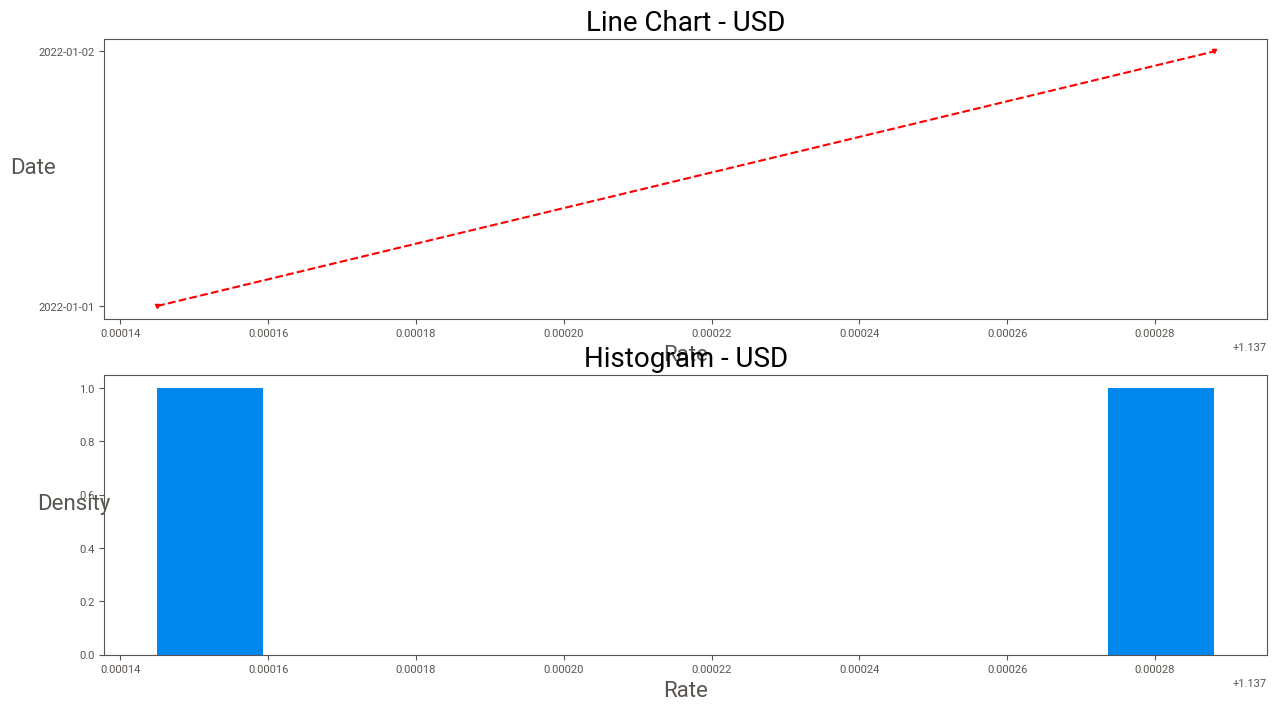

In [109]:
import io
from flask import Response
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from flask import Flask, render_template
import pandas as pd
import seaborn as sns
import matplotlib as mpl

df = pd.read_csv('dags/processed_rates.csv', index_col = 'Unnamed: 0')

symbol = 'USD'
dates = df.date.unique()
    
    # Extract the rates of the symbol in the URL
rates = df[df.symbol == symbol].rate

   # Create a figure and an axis objects
fig, ax = plt.subplots(2,1, figsize = [15,8])

   # Create a line chart
ax[0].plot(rates, dates,  marker = 'v', linestyle= '--' ,c = 'r')
ax[0].set_xlabel('Rate', size = 16)
ax[0].set_ylabel('Date', size = 16, rotation = 0)
ax[0].set_title(f'Line Chart - {symbol}', size = 20)

   # Create a histogram plot
ax[1].hist(rates)
ax[1].set_xlabel('Rate', size = 16)
ax[1].set_ylabel('Density', size = 16, rotation = 0)
ax[1].set_title(f'Histogram - {symbol}', size = 20)

ax[0].get_yaxis().get_major_formatter().set_useOffset(False)

In [106]:
rates

149    1.137145
317    1.137288
Name: rate, dtype: float64